# Customer Churn Prediction - A Deep Learning Based Approach

Table of Contents:
* [About the Data / Problem](#about)
* [Set Up](#setup)
* [Data Preprocessing](#datapre)
* [Exploratory Data Analysis](#eda)
* [Model Building](#model)
* [Model Training](#modelt)
* [Model Evaluation](#modelv)
* [Conclusion](#conclusion)
* [References](#ref)



<a id="about"></a>
# **About the Data / Problem**
This dataset and task can be found on [Kaggle](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset). The overarching task here is to 'create a Machine Learning Model to identify patterns of customer behavior and make predictions about upcoming churn rates. This task translates well to a binary classification problem. More specifically, a artificial convolutional neural network (ANN) will be used to analyze existing customer data, such as credit score and estimated salary etc and prdict if a customer will stay or leave the bank.

The dataset consists of 10,000 customer records of an anonymous bank.

<a id="setup"></a>
# **Set Up**

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
tf.__version__

'2.12.0'

<a id="datapre"></a>
# **Data Preprocessing**

In [39]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [40]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [41]:
print(y)

[1 0 1 ... 1 1 0]


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The dataset has 1000 rows with 14 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [43]:
#Check columns list and missing values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
# Get unique count for each variable
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [45]:
# Check variable data types
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So we moslty have categorical variables and 5 continuous variables

<a id="eda"></a>
# **Exploratory Data Analysis**

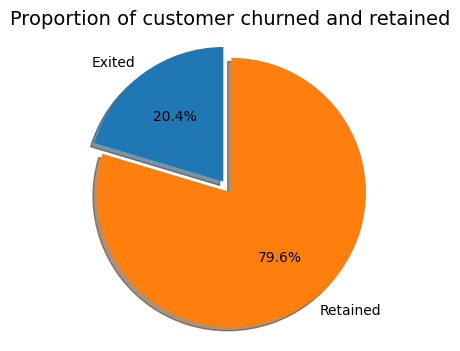

In [46]:
labels = 'Exited', 'Retained'
df=dataset
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 14)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

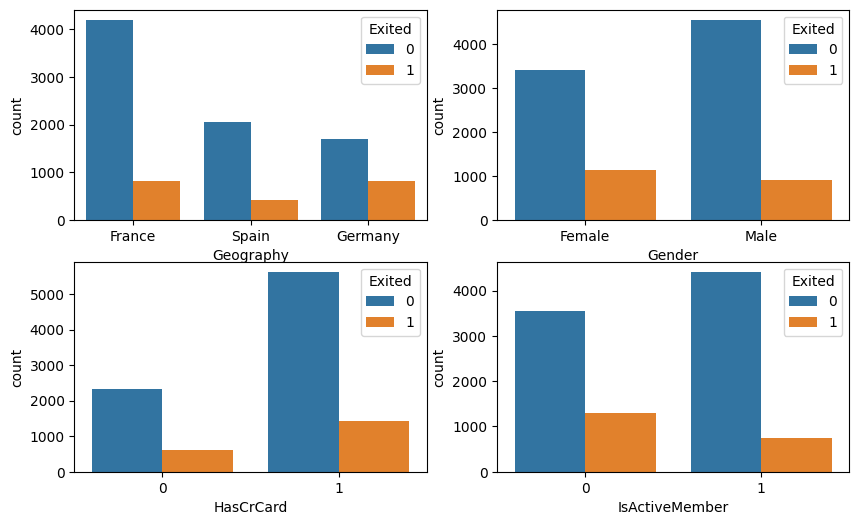

In [47]:
    # Churn 'Status' relation with categorical attributes
    fig, axarr = plt.subplots(2, 2, figsize=(10, 6))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

From the analysis above we see:

Majority of customers are from persons from France. The proportion of female customers churning is also greater than that of male customers.

Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

Churn rate is greater among inactive customers, also overall proportion of inactive mebers is quite high. This means that the bank may need a program to keep the customers active as this will definately have a positive impact on the customer churn.

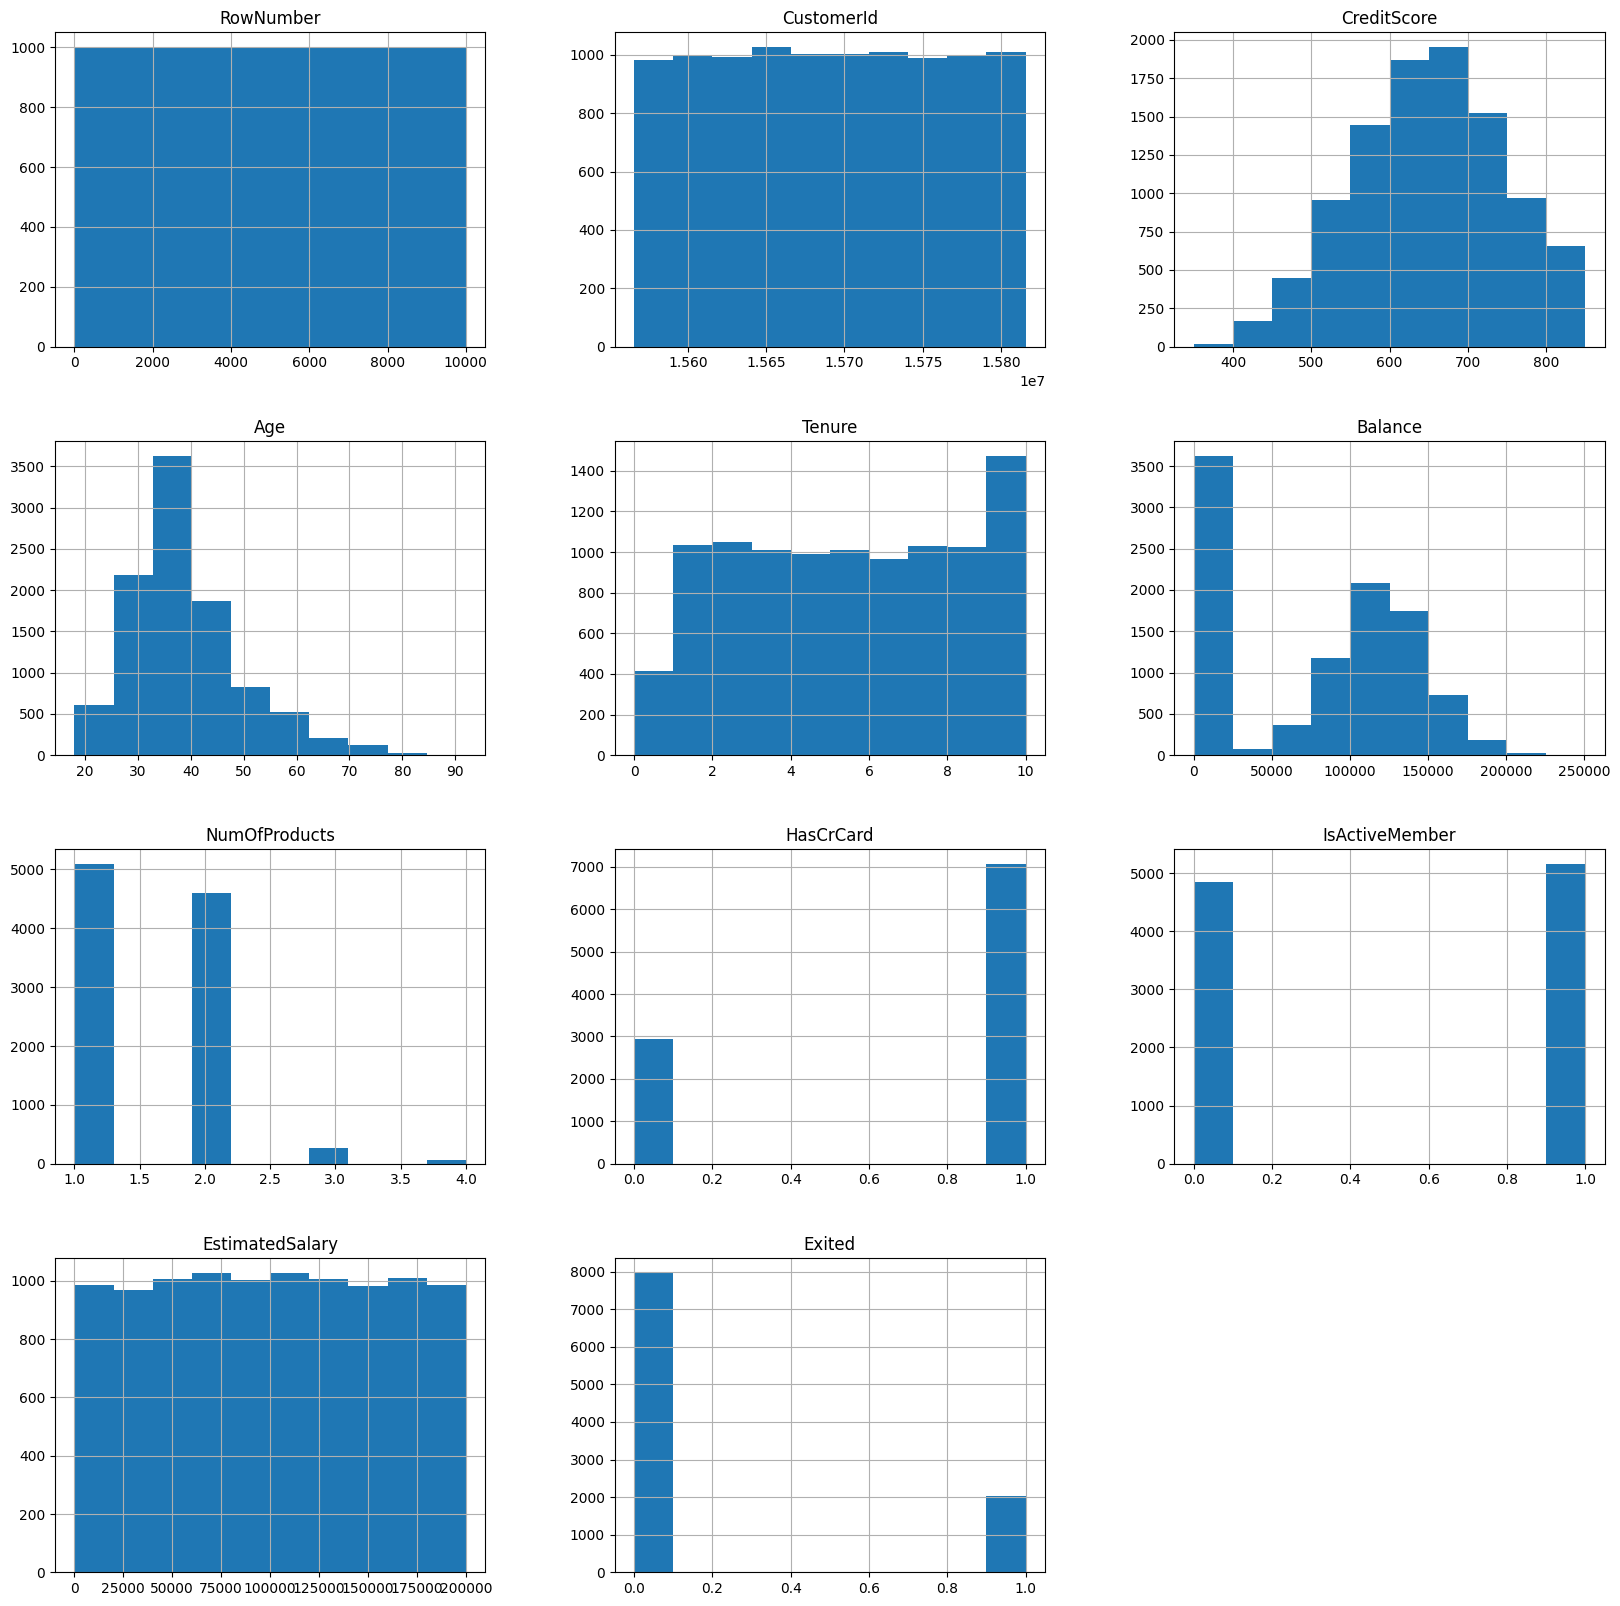

In [48]:
df.hist(figsize=(20,20))
plt.show()

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

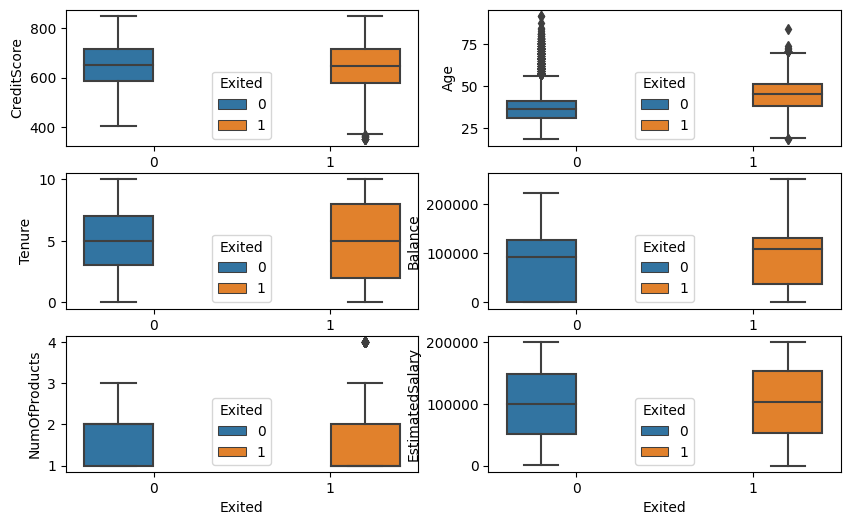

In [49]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(10, 6))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

Based on the box plot above:

* No significant difference in the credit score distribution between retained and churned customers.
* The older customers are churning at more than the younger ones.
* With regard to the tenure, the clients on either extreme end are more likely to churn compared to those that are of average tenure.
* Churn rate high among customers with significant bank balances. This is definitely a concern.
* Neither the product nor the salary has a significant effect on the likelihood to churn.


<a id="model"></a>
# **Model Building**

Before we start building the model, we will do some feature engineering, like encoding categorical columns. Then we will split the dataset to training and testing datset and stanarding the values by feature scaling.


**Label Encoding the "Gender" column**

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [51]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


**One Hot Encoding the "Geography" column**

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [53]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


**Splitting the dataset into the Training set and Test set**

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Architecture

This artificial neural network model has 4 layers.
* One input layer
* Two hidden layers
* One output layer.

The layers are fully connected, and each hidden layer has 6 neurons. The activation function in the hidden layer is Relu and output layer is sigmoid.

In [56]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

<a id="modelt"></a>
# **Model Training**

In [57]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [58]:
history = ann.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5756 - accuracy: 0.7678 - val_loss: 0.4799 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4604 - accuracy: 0.7960 - val_loss: 0.4370 - val_accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4376 - accuracy: 0.7960 - val_loss: 0.4255 - val_accuracy: 0.8005
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4279 - accuracy: 0.7997 - val_loss: 0.4189 - val_accuracy: 0.8150
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4188 - accuracy: 0.8099 - val_loss: 0.4122 - val_accuracy: 0.8195
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4104 - accuracy: 0.8163 - val_loss: 0.4034 - val_accuracy: 0.8240
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4023 - accuracy: 0.8204 - val_loss: 0.3951 - val_accuracy: 0.8280

Plotting Loss Chart

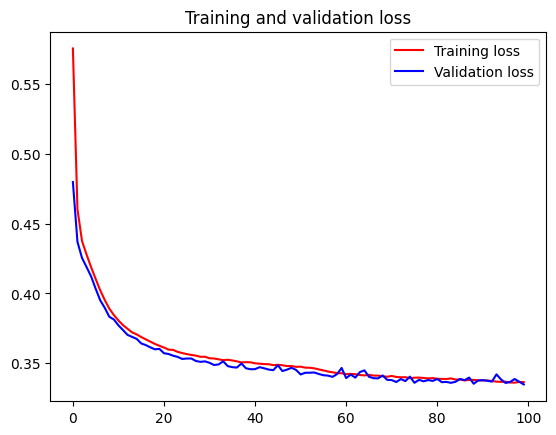

<Figure size 640x480 with 0 Axes>

In [59]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

<a id="modelv"></a>
# **Model Evaluation**

In [60]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


**Evaluation Metrices**

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1527   68]
 [ 201  204]]


0.8655

In [62]:
from sklearn.metrics import precision_score,recall_score,classification_report,f1_score
print('F1 score:',f1_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred))
print('\n classification_report:\n',classification_report(y_test,y_pred))

F1 score: 0.602658788774003
Recall: 0.5037037037037037
Precision: 0.75

 classification_report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.50      0.60       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000



<a id="conclusion"></a>
# **Conclusion**

In this project, I did the customer loss analysis in the bank, which is a classification problem. Churn analysis is an analytical research on “a customer,”  and “the probability of abandonment.” Before the customer leaves us or is about to leave, our aim is to become aware of this scenario and then to take some preventive action. The customer dataset of 10,000 customers were preprocessed, analyzed and trained using a deep learning neural network model. The training scores and test scores of our models are very close to each other.
0 (not churn) values ​​are more dominant because the data is imbalanced. Now, our goal is to find 1(churn) values, so we will try to make the data balanced.

Our aim is to predict the value of 1(churn), that is, the customer who will leave the bank. Both training and test prediction accuracy was 0.86 after 100 epochs. This is a good accuracy,
given the simplicity of the model.

I tried other hyper parameters like adding more layers and more nodes per layer, but there was no significant improvement in accuracy.

Future research could be done by using a larger dataset with additional parameters to further improve the prediction accuracy.

<a id="ref"></a>
# **Github Reference**

https://github.com/occoder2021/churnpredict